In [24]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

In [25]:
file_path = 'C:\\Users\\yadav\\OneDrive\\Desktop\\Wavvy\\audios\\Teri Meri_320(PagaiWorld.com).mp3'  
sr = 22050  
y, sr = librosa.load(file_path, sr=sr, mono=True)
times = np.arange(len(y)) / sr

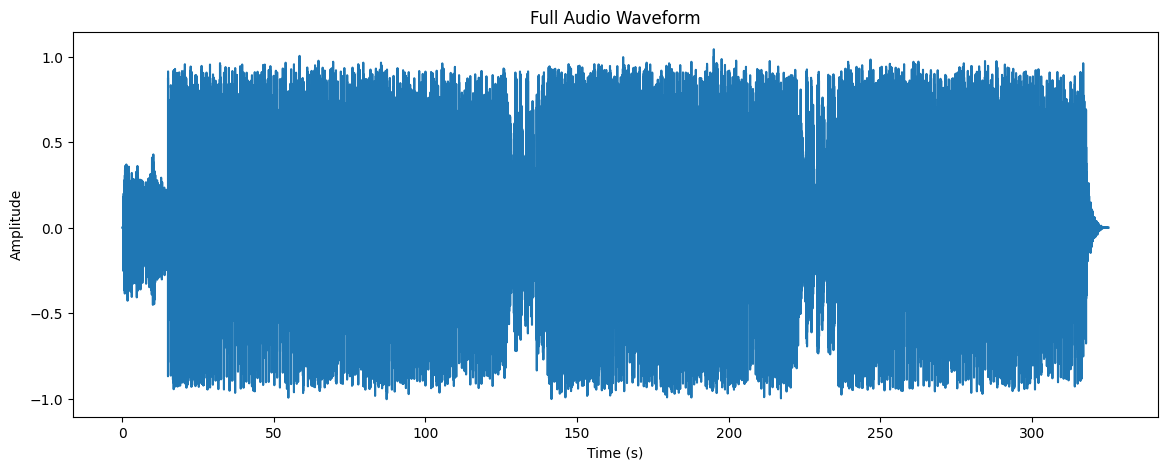

In [26]:
plt.figure(figsize=(14, 5))
plt.plot(times, y)
plt.title('Full Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

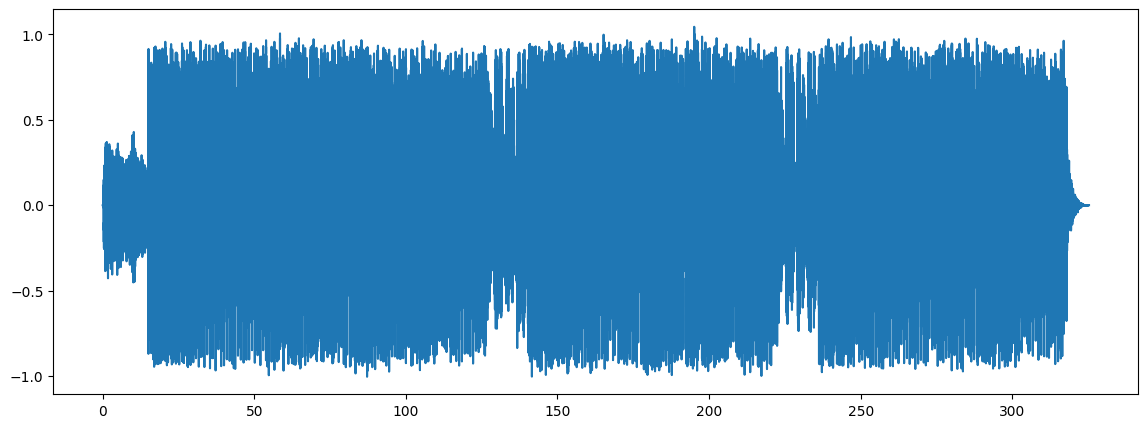

In [27]:
window_duration = 1.5
step_duration = 0.5    

window_size = int(window_duration * sr)
step_size = int(step_duration * sr)

plt.figure(figsize=(14, 5))
plt.plot(times, y, label='Waveform')


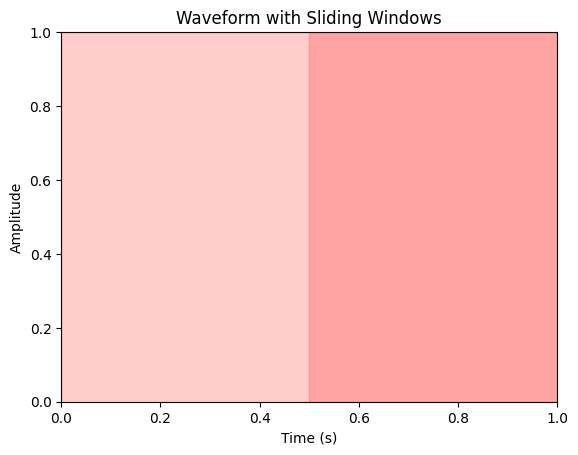

In [28]:
for start in range(0, len(y) - window_size, step_size):
    window_y = y[start:start + window_size]
    start_time = start / sr
    rect = plt.Rectangle((start_time, -1), window_duration, 2, color='red', alpha=0.2)
    plt.gca().add_patch(rect)

plt.title('Waveform with Sliding Windows')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [42]:
S = np.abs(librosa.stft(window_y, n_fft=4096, hop_length=512))
S_db = librosa.amplitude_to_db(S, ref=np.max)

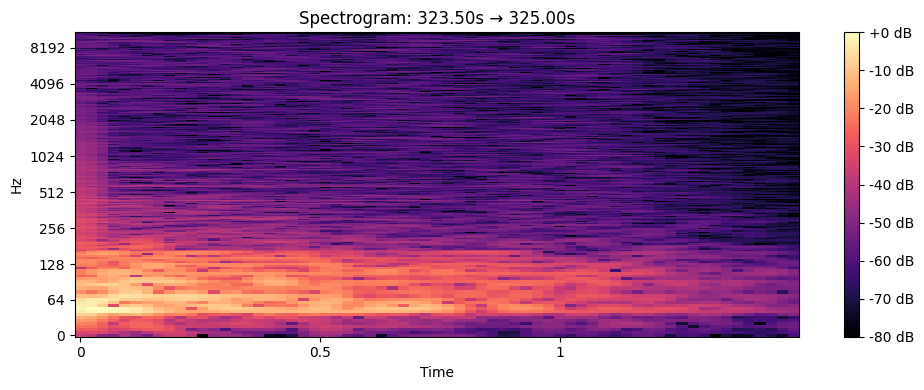

In [43]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', hop_length=512)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram: {start_time:.2f}s → {start_time + window_duration:.2f}s')
plt.tight_layout()
plt.show()

In [56]:
import scipy
neighborhood_size = 10
footprint = np.ones((neighborhood_size, neighborhood_size))
local_max = (scipy.ndimage.maximum_filter(S_db, footprint.shape) == S_db)
peaks = np.argwhere(local_max & (S_db > -40))

C:\Users\yadav\AppData\Local\Temp\ipykernel_22284\4031600133.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


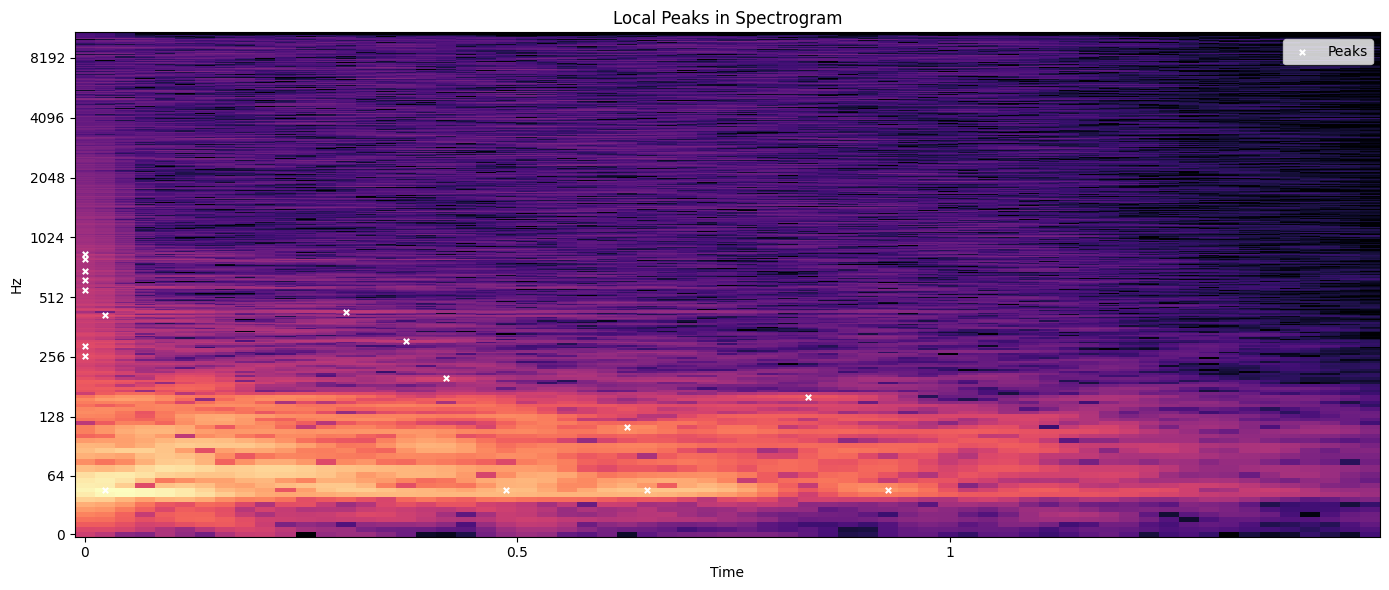

In [57]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, hop_length = 512, y_axis='log', x_axis='time')
plt.scatter(peaks[:, 1] * 512 / sr, 
            librosa.core.fft_frequencies(sr=sr, n_fft=4096)[peaks[:, 0]],
            marker='x', color='white', s=15, label='Peaks')
plt.title("Local Peaks in Spectrogram")
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
peaks_sorted = sorted(peaks, key=lambda x: x[1])
fingerprints = []

In [ ]:
from hashlib import sha1 
for i in range(len(peaks_sorted)):
            for j in range(1, 10):
                if i + j < len(peaks_sorted):
                    f1, t1 = peaks_sorted[i]
                    f2, t2 = peaks_sorted[i + j]
                    delta_t = t2 - t1
                    if 0 < delta_t <= 200:
                        h = sha1(f"{f1}|{f2}|{delta_t}".encode()).hexdigest()[:20]
                        fingerprints.append((h, t1 * 512 / sr + start_time))

In [60]:
print(fingerprints)

[('1090a8663740978bfddf', np.float64(323.5)), ('399fa4c277f18282db9b', np.float64(323.5)), ('8170dea7415b8b1ad35a', np.float64(323.5)), ('f6121430a9358d1223c7', np.float64(323.5)), ('78bd727e53a911d5d03f', np.float64(323.5)), ('90f89db33d16229dc192', np.float64(323.5)), ('10878f76640c62f03158', np.float64(323.5)), ('b298042a5a1e6ff9f6ca', np.float64(323.5)), ('9a8092dc487595288c57', np.float64(323.5)), ('e1db41bdac6973feff9f', np.float64(323.5)), ('9b09c85967b0ff6f4d41', np.float64(323.5)), ('7aa1329c61c75ea3ab11', np.float64(323.5)), ('443657bb82ad38d0a977', np.float64(323.5)), ('e71f5a31309be2f6f1ea', np.float64(323.5)), ('9d733d1547a76fd30279', np.float64(323.5)), ('b50d31b03aa378f4ed88', np.float64(323.5)), ('7d79691869bf710fb8e4', np.float64(323.5)), ('65681d7841d367472ba6', np.float64(323.5)), ('3e5576ad9f05d9026744', np.float64(323.5)), ('c62b83d567246fde2099', np.float64(323.5)), ('644bada9d19f0062e4d3', np.float64(323.5)), ('b70a55bb85adeba36067', np.float64(323.5)), ('5ee5bdb